# Logistic Regression with Tensorflow

## 0. Import the required libraries:
We will start with importing the required Python libraries.

In [1]:
# Numerical computing
import numpy as np
import tensorflow as tf

# Spliting data into train and test
from sklearn.model_selection import train_test_split

# Visualization
from matplotlib import pyplot as plt
# Different colors for cmap
import matplotlib.cm as cm
import seaborn as sns
sns.set()
%matplotlib inline

## 1. Create some artificial dataset

We created some random variable and stack them up together

In [2]:
np.random.seed(34)

x1 = np.random.randn(500)*0.5+3
x2 = np.random.randn(500)*0.5+2

x3 = np.random.randn(500) *0.5 + 4
x4 = np.random.randn(500) *0.5 + 5

In [3]:
# Creating a matrix

X_1 = np.vstack([x1, x2])
X_2 = np.vstack([x3, x4])
X = np.hstack([X_1, X_2]).T
print(X.shape)

(1000, 2)


In [4]:
# Y true labels
# create classes (0, 1)
y = np.hstack([np.zeros(500), np.ones(500)])

### 1.1. Checking the size

In [5]:
# check the shape of input data and labels

print("Shape of X is: ", X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (1000, 2)
Shape of y is:  (1000,)


### 1.2. Visualization of the data

Text(0,0.5,'feature 2')

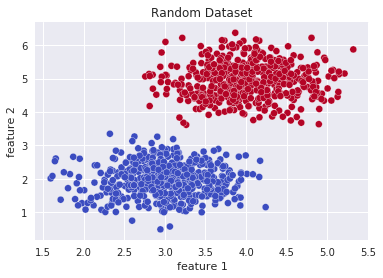

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm, edgecolors='w');
plt.title('Random Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

### 1.3. Spliting data into train and test

Spliting our dataset into train and test example

In [7]:
# Train -> 80%, Test -> 20%
# This returns our dataset split into training and test examples
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    return X_train, X_test, y_train, y_test

In [8]:
# Spliting our data
X_train, X_test, y_train, y_test = split_data(X, y)

Now we should reshape your labels as 2d-tensor (the first dimension will be the batch dimension and the second the scalar label):

In [9]:
# Reshape our label to avoid having a rank-1 array (n,)
# Don't use rank-1 arrays when implement logistic regression, instead use a rank-2 arrays (n, 1)
# We are also making sure our datatypes are converted into float32.

# Our vectorized labels
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

To get a better sense of the data, let's checkout the shapes of the loaded arrays.

In [10]:
print('x_train:\t{}'.format(X_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(800, 2)
y_train:	(800, 1)
x_test:		(200, 2)
y_test:		(200, 1)


## 2. Hyperparameters

Hyperparameters are model-specific properties that are fixed before you even train and test your model on data.

In [11]:
# Hyper-parameters
learning_rate = 0.72 # The optimization initial learning rate
num_epochs =  5000 # Total number of training epochs
display_step = 1

## 3. Create the network graph
After defining all our hyperparameters we can now create our network

### 3.1. Placeholders for the inputs (x) and corresponding labels (y)

Placeholder is an object whose value can be specified only later. To specify values for a placeholder, we need to pass in values by using a "feed dictionary"

In [12]:
# data format is as usual:
# X_train and X_train have shape (num_instances, dimension_of_features)
# Y_train and Y_test have shape (num_instances, dimension_of_classes)

dimension_of_features = X_train.shape[1]
dimension_of_classes = y_train.shape[1]

print("Dimension of our features : ",dimension_of_features)
print("Dimension of our class : ",dimension_of_classes)

Dimension of our features :  2
Dimension of our class :  1


Note ** :
1.   X = Dimension of features is known while number of instances is left undefined
2.   Y = Dimension of classes is known, while number of instances is left undefined





In [13]:
# Create the graph for the linear model
# Placeholders for inputs (data) and outputs(target)
data = tf.placeholder(dtype=tf.float32, shape=[None, dimension_of_features], name='X_placeholder')
target = tf.placeholder(dtype=tf.float32, shape=[None, dimension_of_classes], name='Y_placeholder')

### 3.2. Initialize our paramaters

In [14]:
W = tf.Variable(tf.random_normal([dimension_of_features, dimension_of_classes])* 0.01, name='weights') # W - weights
b = tf.Variable(tf.zeros([dimension_of_classes, dimension_of_classes]), name='bias') # b - bias 

# Add summary ops to collect data
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)

### 3.3. Forward propagation

In [15]:
# Forward-propagation
# Define a simple logistic model z=wx+b
# z_pred will contain predictions the model makes.
Z = tf.add(tf.matmul(data, W) , b)

### 3.4. Define the loss function, optimizer, accuracy, and predicted class

After creating the network, we have to calculate the loss and optimize it. Also, to evaluate our model, we have to calculate the correct_prediction and accuracy. 

In [16]:
# Define the loss function, optimizer, and accuracy
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z, labels=target))

# Create a summary to monitor the loss function
tf.summary.scalar("loss_function", loss)

# Back-propagation
optimizer = tf.train.GradientDescentOptimizer(learning_rate, name='Gradient-optimizer').minimize(loss)

# Calculate the correct predictions
prediction = tf.nn.sigmoid(Z)

# If the prediction is greater than 0.5, it should be considered as class 1, otherwise class 0
correct_prediction = tf.equal(target , (tf.to_float(tf.greater(prediction, 0.5))))
                              
# Calculate our models performance, but first we need to convert our datatype from true and false, into 1 and 0
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### 3.5. Initialize all variables
Here, we have to invoke a variable initializer operation to initialize all variables.

In [17]:
# Create the operation for initializing all variables
init = tf.global_variables_initializer()

# Merge all summaries into a single operator
merged_summary_op = tf.summary.merge_all()

## 4. Train
After creating the graph, we have to create a session and run the graph in our session to train the model.

In [18]:
with tf.Session() as session:

    # run the initialization
    session.run(init)
    
    # visualize on tensorboard
    # tensorboard --logdir='logistic_regression'
    summary_writer = tf.summary.FileWriter('logistic_regression',session.graph)
    
    # keep track of the loss, weight and bias for visualization
    loss_plot = []
    weight_final = []
    bias_final = []
    
    # training loop
    for epoch in range(num_epochs):

        # feeding data to our placeholders
        feed_dict_train = {data: X_train, target: y_train}
        _ , c, prediction_values = session.run([optimizer, loss, prediction], feed_dict=feed_dict_train)
        
        # Save the loss result
        loss_plot.append(c)
        
        # Display logs per 1000 epoch step
        if epoch % 1000 == 0:
            
            print("Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(c),\
                "W=", session.run(W), "b=", session.run(b))
        
        # Write logs for each epoch
        summary_str = session.run(merged_summary_op, feed_dict=feed_dict_train)  
        summary_writer.add_summary(summary_str,  epoch)
    
    # Store our final weigh and bias.
    weight_final = session.run(W)
    bias_final = session.run(b)
    
    print("\nOptimization Finished!\n")
    print ("Train Accuracy:", accuracy.eval({data: X_train, target: y_train}))
    print ("Test Accuracy:", accuracy.eval({data: X_test, target: y_test}))

Epoch: 0001 loss= 0.703539968 W= [[0.240225 ]
 [0.5892119]] b= [[0.01705864]]
Epoch: 1001 loss= 0.029218240 W= [[-1.2218143]
 [ 4.0775213]] b= [[-9.449743]]
Epoch: 2001 loss= 0.016917601 W= [[-0.7046571]
 [ 4.3757825]] b= [[-12.317852]]
Epoch: 3001 loss= 0.012233819 W= [[-0.42152882]
 [ 4.602646  ]] b= [[-14.107265]]
Epoch: 4001 loss= 0.009715360 W= [[-0.22853051]
 [ 4.78509   ]] b= [[-15.423302]]

Optimization Finished!

Train Accuracy: 1.0
Test Accuracy: 1.0


### 4.1. Visualizing our Loss
Summary of our loss after 5000 Epochs

Text(0.5,0,'Epochs')

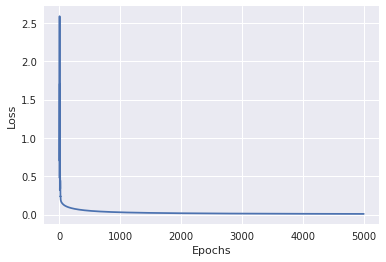

In [19]:
plt.plot(loss_plot)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [20]:
max_loss = np.max(loss_plot)
min_loss = np.min(loss_plot)
print("Maximum Loss : {:.4f}\n".format(max_loss))
print("Minimum Loss : {:.4f}\n".format(min_loss))
print("Loss difference : {:.4f}\n".format(max_loss-min_loss))

Maximum Loss : 2.5856

Minimum Loss : 0.0081

Loss difference : 2.5775



## 5. Visualization

Now we need to get a sense of what our weight and bias values are 

In [21]:
w1_final = weight_final[0, -1]
w2_final = weight_final[1, -1]
b_final =  bias_final[-1,-1]

print("Weight 1 : ",w1_final)
print("Weight 2 : ",w2_final)
print("Bias : ",b_final)

Weight 1 :  -0.08288592
Weight 2 :  4.9381547
Bias :  -16.469645


Text(0,0.5,'feature 2')

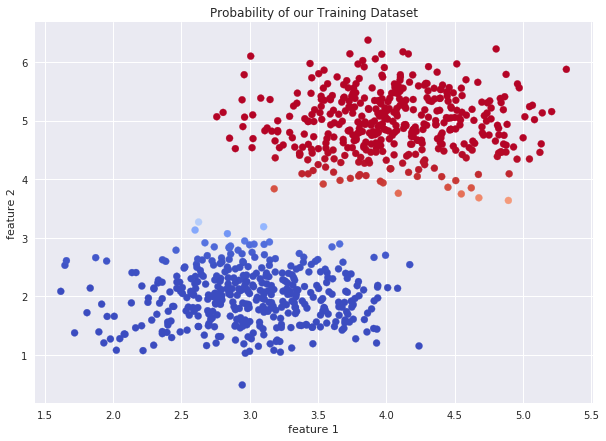

In [22]:
plt.figure(figsize =(10,7))
plt.scatter(X_train[:,0], X_train[:,1], c=prediction_values[:, 0], cmap=cm.coolwarm)
plt.title('Probability of our Training Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

Finally, we can draw our best fitted line, using the equation

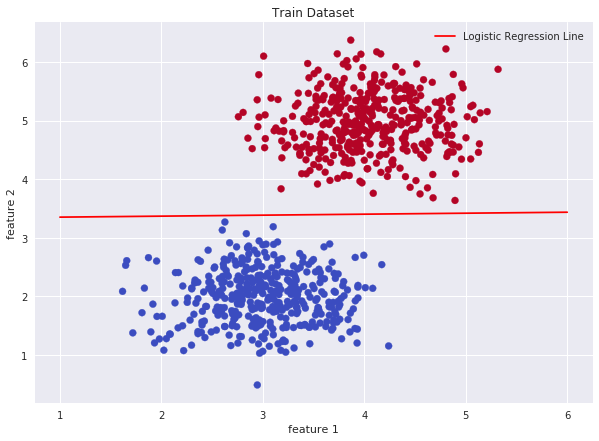

In [23]:
# Training data
x_axis = np.linspace(1, 6)
yy_lr = -(w1_final/w2_final)*x_axis - b_final/w2_final

plt.figure(figsize =(10,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[:, 0], cmap=cm.coolwarm)
plt.plot(x_axis, yy_lr, label = 'Logistic Regression Line', c='r')
plt.title('Train Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

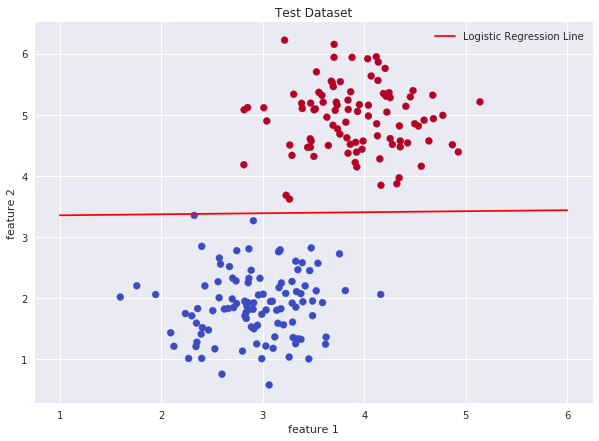

In [24]:
#Test data
x_axis = np.linspace(1, 6)
yy_lr = -(w1_final/w2_final)*x_axis - b_final/w2_final

plt.figure(figsize =(10,7))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test[:, 0], cmap=cm.coolwarm)
plt.plot(x_axis, yy_lr, label = 'Logistic Regression Line', c='r')
plt.title('Test Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

# Scikit-learn Implementation of Logistic Regression

## 0. Import the required libraries:
We will start with importing the required Python libraries.

In [25]:
# First we imported logistic regression
from sklearn.linear_model import LogisticRegression

## 1. Initiliaze the model we would like to use

In [26]:
# Initialized our model to a variable
LR = LogisticRegression()

## 2. Train the model by feeding it data

In [27]:
# We trained our model with our random dataset
LR.fit(X_train, y_train)

/home/davidpraise/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 3. Decision making
Using the results gotten from predict_proba to determine which data points are more likely to belong to either class 1 or 2.

In [28]:
z_prob = LR.predict_proba(X_train)

Now Lets see how well our model has learned, by giving it some input features with no labels

In [29]:
z_prediction = LR.predict(X_test)

Now we can test how accurate our model was

In [30]:
score = sum(z_prediction == y_test[:, 0]) / len(y_test)
print("Accuracy score : {:.2f}%".format(score*100))

Accuracy score : 0.99%


With an accuracy score of 99% not bad, but our model on tensorflow seemed to have performed better

## 4. Visualization

Getting our coefficient and the intercept to use for plotting a decision boundary

In [31]:
w1_final = LR.coef_[0][0]
w2_final = LR.coef_[0][1]
b_final =  LR.intercept_[0]

print("Weight 1 : ",w1_final)
print("Weight 2 : ",w2_final)
print("Bias : ",b_final)

Weight 1 :  -1.0777572143093688
Weight 2 :  3.3020594519200483
Bias :  -7.301394499471581


Lets see which class a data point is more likely to fall on

Text(0,0.5,'feature 2')

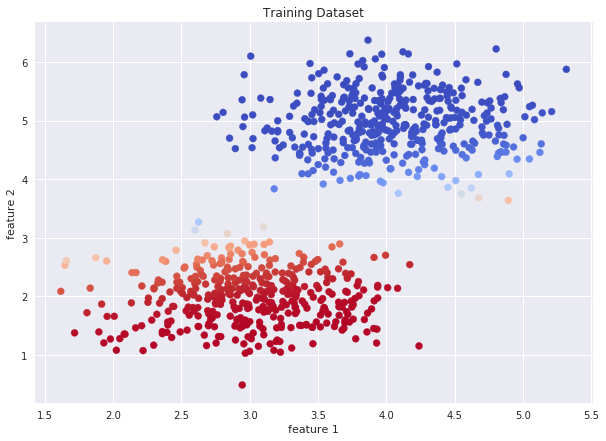

In [32]:
plt.figure(figsize =(10,7))

plt.scatter(X_train[:, 0], X_train[:, 1], c= z_prob[:, 0], cmap=cm.coolwarm)
plt.title('Training Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

Text(0,0.5,'feature 2')

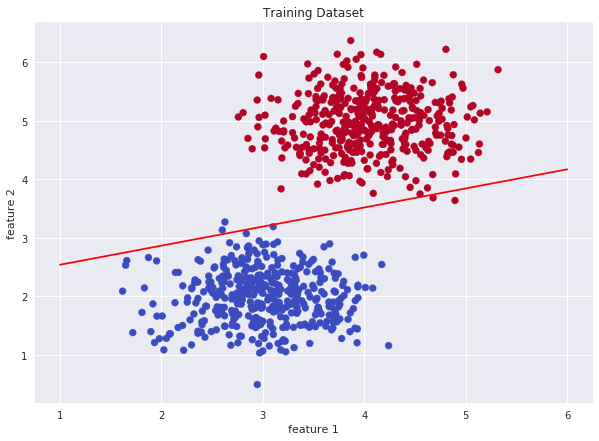

In [33]:
# Training dataset visualization

plt.figure(figsize =(10,7))

x_axis = np.linspace(1, 6)
yy_lr = -(w1_final/w2_final)*x_axis - b_final/w2_final
plt.plot(x_axis, yy_lr, label = 'Logistic Regression Line', c='r')

plt.scatter(X_train[:, 0], X_train[:, 1], c= y_train[:, 0], cmap=cm.coolwarm)
plt.title('Training Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

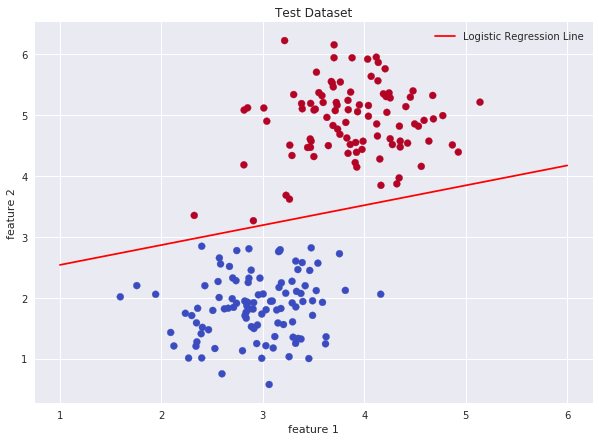

In [34]:
# Test dataset visualization
plt.figure(figsize =(10,7))
x_axis = np.linspace(1, 6)

yy_lr = -(w1_final/w2_final)*x_axis - b_final/w2_final

plt.plot(x_axis, yy_lr, label = 'Logistic Regression Line', c='r')
plt.scatter(X_test[:, 0], X_test[:, 1], c= z_prediction, cmap=cm.coolwarm)
plt.title('Test Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()